##***PROJECT NAME- IIoT ATTACK DETECTION***


> BY:

> Name- Bharatdeep Singh

> URN:2104080

> Name- Divneet Kaur

> URN:2104093















**This project contains two section**

> The first section simply detect that whether attack  is there or not . We used different models and chose XGBoost to be the best model for this purpose as it showed best accuracy


> The second section identifies the type of attack also. Again we used different models for this purpose and found XGBoost to be the best model for this purpose. Not only this with help of Hybrid model we improved accuracy of Naive Bayes also





##***1.) Detecting Attack***


In [9]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#Downloading file
!gdown 1l21jriB_GCUPBjfJ-Se5NGzsNUOeQKpr

Downloading...
From: https://drive.google.com/uc?id=1l21jriB_GCUPBjfJ-Se5NGzsNUOeQKpr
To: /content/wustl_iiot_2021.csv
100% 410M/410M [00:01<00:00, 223MB/s]


In [12]:
#Uploading file
df=pd.read_csv('/content/wustl_iiot_2021.csv')

In [13]:
#Shape of dataframe
df.shape

(1194464, 49)

In [5]:
df.head()

,StartTime,LastTime,SrcAddr,DstAddr,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,...,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Traffic,Target
0,2019-08-19 12:23:28,2019-08-19 12:23:28,192.168.0.20,192.168.0.2,0,59034,502,10,8,18,...,24,20,44,0.001176,0.053037,0,0.000000,0.0,normal,0
1,2019-08-19 15:13:24,2019-08-19 15:13:24,192.168.0.20,192.168.0.2,0,55841,502,10,8,18,...,24,20,44,0.001308,0.052681,0,0.000000,0.0,normal,0
2,2019-08-19 13:41:31,2019-08-19 13:41:31,192.168.0.20,192.168.0.2,0,63774,502,10,8,18,...,24,20,44,0.000690,0.051793,0,0.000000,0.0,normal,0
3,2019-08-19 12:43:19,2019-08-19 12:43:20,209.240.235.92,192.168.0.2,0,61771,80,4,0,4,...,0,0,0,0.000000,0.889555,0,419.338813,0.0,DoS,1
4,2019-08-19 14:49:44,2019-08-19 14:49:48,192.168.0.20,192.168.0.1,3,0,0,14,0,14,...,476,0,476,0.000000,3.500055,0,525.146562,0.0,normal,0


In [36]:
df.drop(columns=['StartTime','LastTime', 'SrcAddr', 'DstAddr', 'sIpId', 'dIpId'],axis=1,inplace=True)
df.head()

,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,DstBytes,SrcBytes,TotBytes,SrcLoad,...,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Traffic,Target
0,0,59034,502,10,8,18,508,644,1152,87486.093750,...,24,20,44,0.001176,0.053037,0,0.000000,0.0,normal,0
1,0,55841,502,10,8,18,508,644,1152,88077.296875,...,24,20,44,0.001308,0.052681,0,0.000000,0.0,normal,0
2,0,63774,502,10,8,18,508,644,1152,89587.390625,...,24,20,44,0.000690,0.051793,0,0.000000,0.0,normal,0
3,0,61771,80,4,0,4,0,248,248,1672.746582,...,0,0,0,0.000000,0.889555,0,419.338813,0.0,DoS,1
4,3,0,0,14,0,14,0,868,868,1842.256714,...,476,0,476,0.000000,3.500055,0,525.146562,0.0,normal,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194464 entries, 0 to 1194463
Data columns (total 43 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Mean        1194464 non-null  int64  
 1   Sport       1194464 non-null  int64  
 2   Dport       1194464 non-null  int64  
 3   SrcPkts     1194464 non-null  int64  
 4   DstPkts     1194464 non-null  int64  
 5   TotPkts     1194464 non-null  int64  
 6   DstBytes    1194464 non-null  int64  
 7   SrcBytes    1194464 non-null  int64  
 8   TotBytes    1194464 non-null  int64  
 9   SrcLoad     1194464 non-null  float64
 10  DstLoad     1194464 non-null  float64
 11  Load        1194464 non-null  float64
 12  SrcRate     1194464 non-null  float64
 13  DstRate     1194464 non-null  float64
 14  Rate        1194464 non-null  float64
 15  SrcLoss     1194464 non-null  int64  
 16  DstLoss     1194464 non-null  int64  
 17  Loss        1194464 non-null  int64  
 18  pLoss       1194464 no

In [38]:
df.describe()

,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,DstBytes,SrcBytes,TotBytes,SrcLoad,...,dTtl,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Target
count,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,...,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06
mean,1.286870e-01,5.445253e+04,7.907604e+02,1.665579e+02,1.688389e+01,1.756631e+02,7.601579e+03,1.938043e+04,2.779692e+05,1.571207e+07,...,5.828585e+01,2.192527e+02,7.051507e+03,6.581117e+05,1.801930e-03,1.994698e-01,7.531412e-03,6.189383e+01,2.653724e-01,7.284941e-02
std,6.859156e-01,1.200834e+04,3.299492e+03,5.266192e+04,1.137763e+03,5.266221e+04,7.508699e+05,4.730229e+06,1.918939e+07,8.339078e+07,...,1.863798e+01,2.852114e+03,7.445876e+05,4.167380e+07,5.485539e-02,7.966451e-01,7.442284e-01,4.143742e+02,5.001929e+00,2.598893e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,5.221800e+04,5.020000e+02,1.000000e+01,8.000000e+00,1.800000e+01,5.080000e+02,6.440000e+02,1.152000e+03,8.514543e+04,...,6.400000e+01,2.400000e+01,2.000000e+01,4.400000e+01,6.310000e-04,5.134900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.663500e+04,5.020000e+02,1.000000e+01,8.000000e+00,1.800000e+01,5.080000e+02,6.440000e+02,1.152000e+03,8.818777e+04,...,6.400000e+01,2.400000e+01,2.000000e+01,4.400000e+01,6.750000e-04,5.206700e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,6.104300e+04,5.020000e+02,1.000000e+01,8.000000e+00,1.800000e+01,5.080000e+02,6.440000e+02,1.152000e+03,8.968784e+04,...,6.400000e+01,2.400000e+01,2.000000e+01,4.400000e+01,8.020000e-04,5.324900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,2.765721e+06,6.552200e+04,2.773967e+07,3.092160e+05,2.773967e+07,8.251559e+07,2.108646e+09,2.143725e+09,1.156000e+09,...,1.280000e+02,9.979300e+04,8.182314e+07,4.293700e+09,3.036730e+00,5.103213e+00,2.070000e+02,4.999440e+03,7.695150e+02,1.000000e+00


In [39]:
#checking missing values
df.isnull()

,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,DstBytes,SrcBytes,TotBytes,SrcLoad,...,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Traffic,Target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1194460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1194461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1194462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
#dropping missing value columns
df.dropna()

,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,DstBytes,SrcBytes,TotBytes,SrcLoad,...,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Traffic,Target
0,0,59034,502,10,8,18,508,644,1152,87486.093750,...,24,20,44,0.001176,0.053037,0,0.000000,0.0,normal,0
1,0,55841,502,10,8,18,508,644,1152,88077.296875,...,24,20,44,0.001308,0.052681,0,0.000000,0.0,normal,0
2,0,63774,502,10,8,18,508,644,1152,89587.390625,...,24,20,44,0.000690,0.051793,0,0.000000,0.0,normal,0
3,0,61771,80,4,0,4,0,248,248,1672.746582,...,0,0,0,0.000000,0.889555,0,419.338813,0.0,DoS,1
4,3,0,0,14,0,14,0,868,868,1842.256714,...,476,0,476,0.000000,3.500055,0,525.146562,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194459,0,57730,502,10,8,18,508,644,1152,85970.507812,...,24,20,44,0.001238,0.053972,0,0.000000,0.0,normal,0
1194460,0,59930,502,6,6,12,386,396,782,80946.835938,...,24,22,46,0.000646,0.032614,0,0.000000,0.0,normal,0
1194461,0,64384,502,10,8,18,508,644,1152,87953.750000,...,24,20,44,0.000668,0.052755,0,0.000000,0.0,normal,0
1194462,0,53833,502,10,8,18,508,644,1152,89604.695312,...,24,20,44,0.000676,0.051783,0,0.000000,0.0,normal,0


In [41]:
#checking again for missing values
df.isnull().sum()

Mean          0
Sport         0
Dport         0
SrcPkts       0
DstPkts       0
TotPkts       0
DstBytes      0
SrcBytes      0
TotBytes      0
SrcLoad       0
DstLoad       0
Load          0
SrcRate       0
DstRate       0
Rate          0
SrcLoss       0
DstLoss       0
Loss          0
pLoss         0
SrcJitter     0
DstJitter     0
SIntPkt       0
DIntPkt       0
Proto         0
Dur           0
TcpRtt        0
IdleTime      0
Sum           0
Min           0
Max           0
sDSb          0
sTtl          0
dTtl          0
SAppBytes     0
DAppBytes     0
TotAppByte    0
SynAck        0
RunTime       0
sTos          0
SrcJitAct     0
DstJitAct     0
Traffic       0
Target        0
dtype: int64

In [17]:
#counting target values
df["Target"].value_counts()

0    1107448
1      87016
Name: Target, dtype: int64

##Visual Description

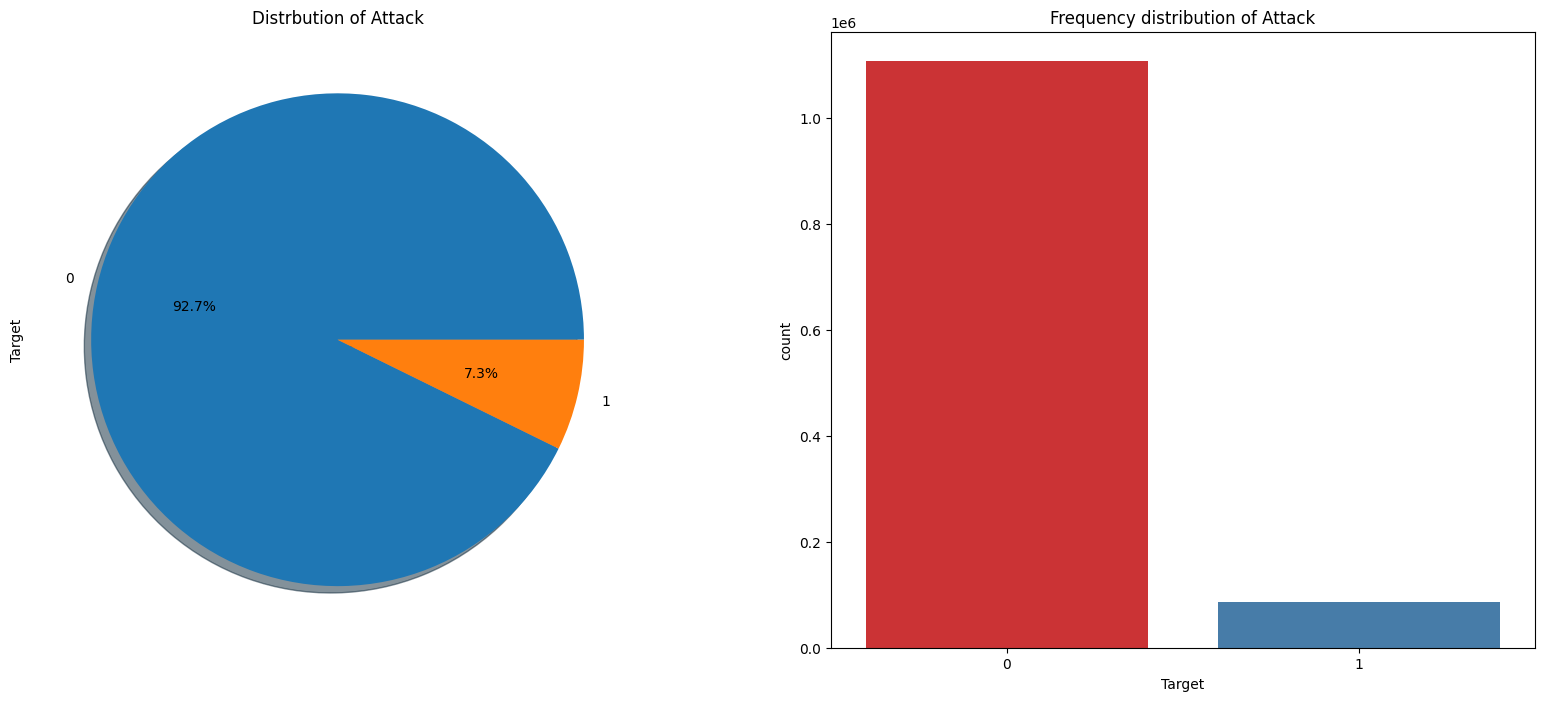

In [18]:
f,ax=plt.subplots(1,2,figsize=(20,8))
ax[0] = df['Target'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distrbution of Attack')
ax[1] = sns.countplot(x="Target", data=df, palette="Set1",linewidth=1.0)
ax[1].set_title("Frequency distribution of Attack")
plt.show()

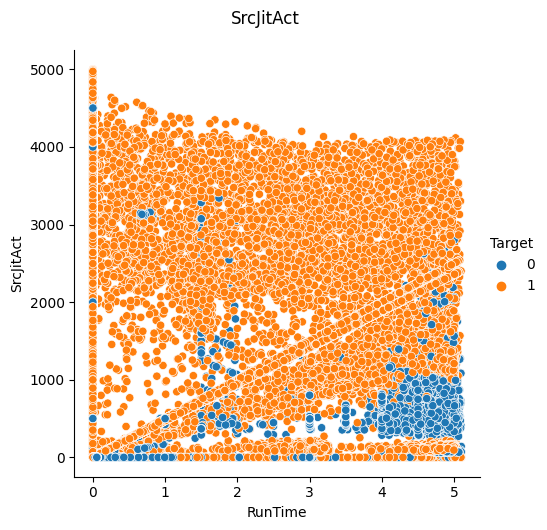

In [19]:
#Identification of attacks by distribution between runtime and SrcJitt
col="SrcJitAct"
sns.relplot(x="RunTime",y=col,hue="Target",data=df)
plt.suptitle(col,y=1.05)
plt.show()

##Manual Modeling

In [42]:
#importing train test split
from sklearn.model_selection import train_test_split

In [43]:
df_train,df_test=train_test_split(df,test_size=0.25)

In [44]:
df_train.shape

(895848, 43)

In [23]:
df_test.shape

(298616, 49)

In [24]:
#Splitting data
from sklearn.model_selection import train_test_split
X3=df.drop(columns='Target')
y3=df['Target']
X3_train, X3_test, y3_train, y3_test =train_test_split(X3,y3,test_size=0.25,stratify=y3,random_state=8)

In [25]:
#creating manual function
def single_feature_prediction(RunTime):
    if RunTime<0.06:
        return 0
    else:
        return 1

In [26]:
df_train.columns

Index(['StartTime', 'LastTime', 'SrcAddr', 'DstAddr', 'Mean', 'Sport', 'Dport',
       'SrcPkts', 'DstPkts', 'TotPkts', 'DstBytes', 'SrcBytes', 'TotBytes',
       'SrcLoad', 'DstLoad', 'Load', 'SrcRate', 'DstRate', 'Rate', 'SrcLoss',
       'DstLoss', 'Loss', 'pLoss', 'SrcJitter', 'DstJitter', 'SIntPkt',
       'DIntPkt', 'Proto', 'Dur', 'TcpRtt', 'IdleTime', 'Sum', 'Min', 'Max',
       'sDSb', 'sTtl', 'dTtl', 'sIpId', 'dIpId', 'SAppBytes', 'DAppBytes',
       'TotAppByte', 'SynAck', 'RunTime', 'sTos', 'SrcJitAct', 'DstJitAct',
       'Traffic', 'Target'],
      dtype='object')

In [27]:
column_36_data = X3_train.iloc[:, 36]

In [28]:
manual_y_predictions=np.array([single_feature_prediction(val) for val in column_36_data])

In [29]:
manual_y_predictions.shape

(895848,)

In [30]:
y3_train.shape

(895848,)

In [31]:
#checking accuracy
manual_model_accuracy=np.mean(manual_y_predictions==y3_train)
print(f"manual model accuracy:{manual_model_accuracy*100:.2f}%")

manual model accuracy:2.33%


#Naive Bayes Algorithm

In [45]:
#splitting data
X4=df.drop(columns=['Traffic','Target'],axis=1)
Y4=df["Target"]

In [46]:
from sklearn.model_selection import train_test_split
X4_train,X4_test,y4_train,y4_test=train_test_split(X4,Y4,test_size=0.25)


In [47]:
#fitting data
from sklearn.naive_bayes import GaussianNB
model4=GaussianNB()

In [48]:
model4.fit(X4_train,y4_train)

GaussianNB()

In [49]:
y_pred=model4.predict(X4_test)

In [50]:
#displaying confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y4_test,y_pred)

array([[273165,   3692],
       [  1426,  20333]])

In [51]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y4_test,y_pred)

0.9828609317652102

##Random Forest

In [52]:
X=df.iloc[:,:-2]
y=df.iloc[:,-1]

In [53]:
#splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=99)

In [54]:
#fitting data
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(criterion="gini",max_depth=8,min_samples_split=10,random_state=5)

In [55]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert the categorical target variable to numerical labels
y_train = label_encoder.fit_transform(y_train)

In [56]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [57]:
clf.feature_importances_

array([8.59582079e-05, 3.58960010e-02, 2.02004266e-02, 6.53135293e-03,
       2.48037887e-02, 1.66219538e-02, 1.29125360e-01, 2.12321340e-02,
       1.36106485e-02, 7.42094352e-03, 5.92146531e-02, 6.32659581e-03,
       1.17394318e-03, 4.47432095e-02, 2.04728529e-03, 1.06952558e-02,
       3.18380912e-02, 2.21929300e-02, 1.17302183e-02, 8.86846643e-04,
       4.92344515e-02, 4.66652581e-04, 1.09385807e-01, 1.21928060e-02,
       9.15456807e-04, 9.40278763e-03, 1.00088260e-02, 1.78871583e-03,
       1.60808932e-03, 6.80542485e-04, 2.31440855e-05, 2.04949108e-01,
       2.24292981e-02, 8.92003770e-03, 6.93612735e-02, 1.37055013e-02,
       1.51677461e-02, 2.71629146e-03, 4.28753578e-05, 5.83442583e-04,
       3.95504397e-05])

In [58]:
y_pred=clf.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9999430706994936

In [60]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276773
           1       1.00      1.00      1.00     21843

    accuracy                           1.00    298616
   macro avg       1.00      1.00      1.00    298616
weighted avg       1.00      1.00      1.00    298616



In [61]:
#feature importance
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

sTtl          0.204949
DstBytes      0.129125
DIntPkt       0.109386
DAppBytes     0.069361
DstLoad       0.059215
DstJitter     0.049234
DstRate       0.044743
Sport         0.035896
DstLoss       0.031838
DstPkts       0.024804
dTtl          0.022429
Loss          0.022193
SrcBytes      0.021232
Dport         0.020200
TotPkts       0.016622
SynAck        0.015168
TotAppByte    0.013706
TotBytes      0.013611
Proto         0.012193
pLoss         0.011730
SrcLoss       0.010695
IdleTime      0.010009
TcpRtt        0.009403
SAppBytes     0.008920
SrcLoad       0.007421
SrcPkts       0.006531
Load          0.006327
RunTime       0.002716
Rate          0.002047
Sum           0.001789
Min           0.001608
SrcRate       0.001174
Dur           0.000915
SrcJitter     0.000887
Max           0.000681
SrcJitAct     0.000583
SIntPkt       0.000467
Mean          0.000086
sTos          0.000043
DstJitAct     0.000040
sDSb          0.000023
dtype: float64

Text(0, 0.5, 'FEATURE NAMES')

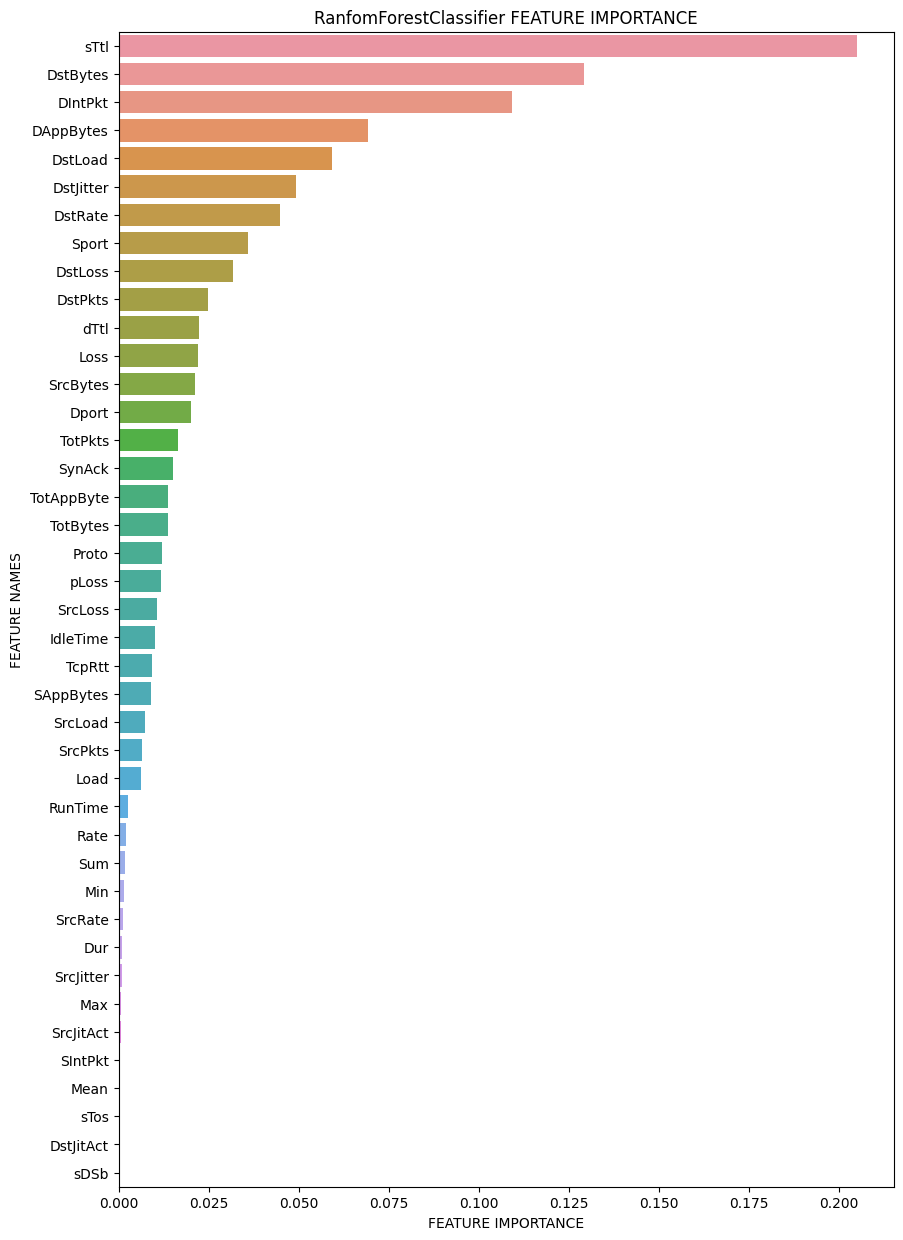

In [62]:
#displaying feature importance
data={'feature_names':feature_scores.index,'feature_importance':feature_scores}
feature_importance = pd.DataFrame(data)
#Sort the DataFrame in order decreasing feature importance
feature_importance.sort_values(by=['feature_importance'], ascending=False,inplace=True)
#Define size of bar plot
plt.figure(figsize=(10,15))
#Plot Searborn bar chart
sns.barplot(x=feature_importance['feature_importance'], y=feature_importance['feature_names'])
#Add chart labels
plt.title('RanfomForestClassifier FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

##Accuracy with selected features

In [63]:
features = feature_scores[feature_scores >= 0.03].index

In [64]:
df_filtered = X[features]

In [65]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(df_filtered, y, test_size = 0.3, random_state = 0)

In [66]:
#splitting data
from sklearn.metrics import accuracy_score, classification_report
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Model accuracy score with selected features : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_pred,y_test))

Model accuracy score with selected features : 0.9998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    332140
           1       1.00      1.00      1.00     26200

    accuracy                           1.00    358340
   macro avg       1.00      1.00      1.00    358340
weighted avg       1.00      1.00      1.00    358340



In [67]:
y_pred=clf.predict(X_test)

In [68]:
#predicting accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9998269799631635

##Logistic Regression

In [69]:
X1=df.drop(columns=['Traffic','Target'],axis=1)
Y1=df["Target"]

In [70]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.25,random_state=42)

In [71]:
#importing model
from sklearn.linear_model import LogisticRegression

In [72]:
model2=LogisticRegression()

In [73]:
model2.fit(X1_train,Y1_train)

LogisticRegression()

In [74]:
predictions=model2.predict(X1_test)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(Y1_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    276896
           1       0.83      0.34      0.48     21720

    accuracy                           0.95    298616
   macro avg       0.89      0.67      0.73    298616
weighted avg       0.94      0.95      0.94    298616



In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y1_test,predictions)

array([[275375,   1521],
       [ 14305,   7415]])

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(Y1_test,predictions)

0.947002170010984

##XGBoost

In [78]:
X=df.drop(columns=['Traffic','Target'],axis=1)
Y=df["Target"]

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [81]:
import xgboost as xgb
reg=xgb.XGBClassifier(n_estimators=10,learning_rate=0.01)
reg.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [82]:
y_xgb_pred=reg.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_xgb_pred)

array([[276889,      7],
       [    15,  21705]])

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_xgb_pred)

0.9999263267875801

In [85]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276896
           1       1.00      1.00      1.00     21720

    accuracy                           1.00    298616
   macro avg       1.00      1.00      1.00    298616
weighted avg       1.00      1.00      1.00    298616



In [86]:
from xgboost import XGBClassifier
model=XGBClassifier(max_depth=1)
model.fit(X_train,Y_train)
y_predict=model.predict(X_test)
y_train_predict=model.predict(X_train)
from sklearn.metrics import accuracy_score
print('Train accuracy ', accuracy_score(Y_train,y_train_predict))
print("Test accuracy",accuracy_score(Y_test,y_predict))

Train accuracy  0.9998236307945098
Test accuracy 0.9997756315803574


XGBoost: Precision: 1.00 for both classes (0 and 1) Recall: 1.00 for both classes (0 and 1) F1-score: 1.00 for both classes (0 and 1) Random Forest: Precision: 0.95 for class 0, 0.83 for class 1 Recall: 0.99 for class 0, 0.34 for class 1 F1-score: 0.97 for class 0, 0.48 for class 1 Based on these metrics, the XGBoost model appears to perform better than the Random Forest model, particularly for class 1 (the positive class). The XGBoost model achieved perfect precision, recall, and F1-score for both classes, which indicates that it correctly classified all instances of both classes.

##***2.) Detecting Attack and Classifying it***

---



In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#downloading file from google drive
!gdown 1l21jriB_GCUPBjfJ-Se5NGzsNUOeQKpr

Downloading...
From: https://drive.google.com/uc?id=1l21jriB_GCUPBjfJ-Se5NGzsNUOeQKpr
To: /content/wustl_iiot_2021.csv
100% 410M/410M [00:05<00:00, 71.5MB/s]


In [ ]:
#reading file by using Pandas Library
df=pd.read_csv('/content/wustl_iiot_2021.csv')

##Feature Engineering

In [ ]:
#dropping columns
df.drop(columns=['StartTime','LastTime', 'SrcAddr', 'DstAddr', 'sIpId', 'dIpId'],axis=1,inplace=True)
df.head()

,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,DstBytes,SrcBytes,TotBytes,SrcLoad,...,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Traffic,Target
0,0,59034,502,10,8,18,508,644,1152,87486.093750,...,24,20,44,0.001176,0.053037,0,0.000000,0.0,normal,0
1,0,55841,502,10,8,18,508,644,1152,88077.296875,...,24,20,44,0.001308,0.052681,0,0.000000,0.0,normal,0
2,0,63774,502,10,8,18,508,644,1152,89587.390625,...,24,20,44,0.000690,0.051793,0,0.000000,0.0,normal,0
3,0,61771,80,4,0,4,0,248,248,1672.746582,...,0,0,0,0.000000,0.889555,0,419.338813,0.0,DoS,1
4,3,0,0,14,0,14,0,868,868,1842.256714,...,476,0,476,0.000000,3.500055,0,525.146562,0.0,normal,0


In [ ]:
#creating a new column representing targets
df['Target_Names']=df['Traffic'].map({'normal':0,'DoS':1,'Reconn':2,'Backdoor':3,'CommInj':4})

In [ ]:
#counting number of counts per target
df['Target_Names'].value_counts()

0    1107448
1      78305
2       8240
4        259
3        212
Name: Target_Names, dtype: int64

In [ ]:
#checking for presence of null/missing values
df.isnull().sum()

Mean            0
Sport           0
Dport           0
SrcPkts         0
DstPkts         0
TotPkts         0
DstBytes        0
SrcBytes        0
TotBytes        0
SrcLoad         0
DstLoad         0
Load            0
SrcRate         0
DstRate         0
Rate            0
SrcLoss         0
DstLoss         0
Loss            0
pLoss           0
SrcJitter       0
DstJitter       0
SIntPkt         0
DIntPkt         0
Proto           0
Dur             0
TcpRtt          0
IdleTime        0
Sum             0
Min             0
Max             0
sDSb            0
sTtl            0
dTtl            0
SAppBytes       0
DAppBytes       0
TotAppByte      0
SynAck          0
RunTime         0
sTos            0
SrcJitAct       0
DstJitAct       0
Traffic         0
Target          0
Target_Names    0
dtype: int64

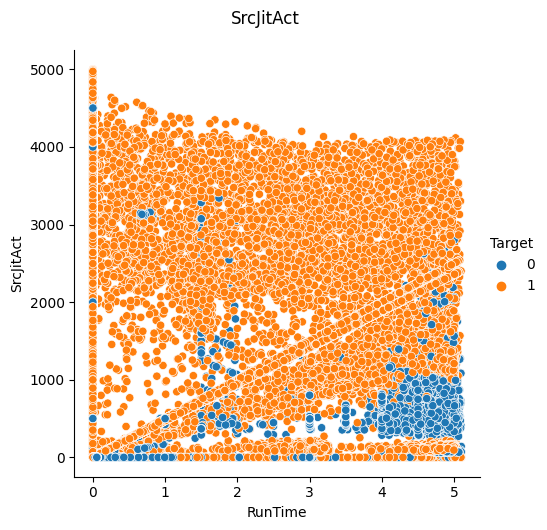

In [ ]:
#Analyzing thorough graph the presence of Attack using two important features SourceJitter and RunTime
col="SrcJitAct"
sns.relplot(x="RunTime",y=col,hue="Target",data=df)
plt.suptitle(col,y=1.05)
plt.show()

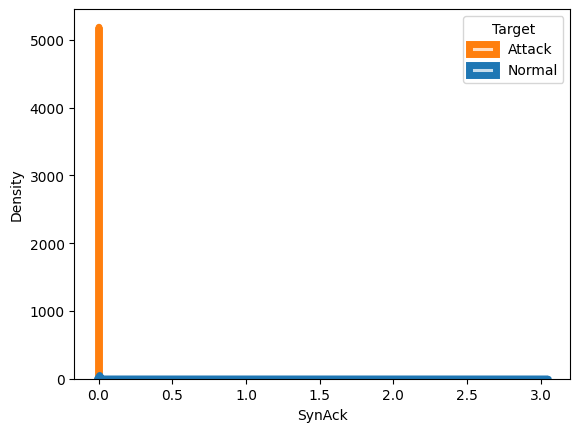

In [ ]:
#Analyzing thorough graph the presence of Attack using SynAck
sns.kdeplot(data=df, x='SynAck', hue='Target', fill=True,linewidth=5.0)
plt.legend(title='Target', labels=['Attack', 'Normal'])
plt.show()

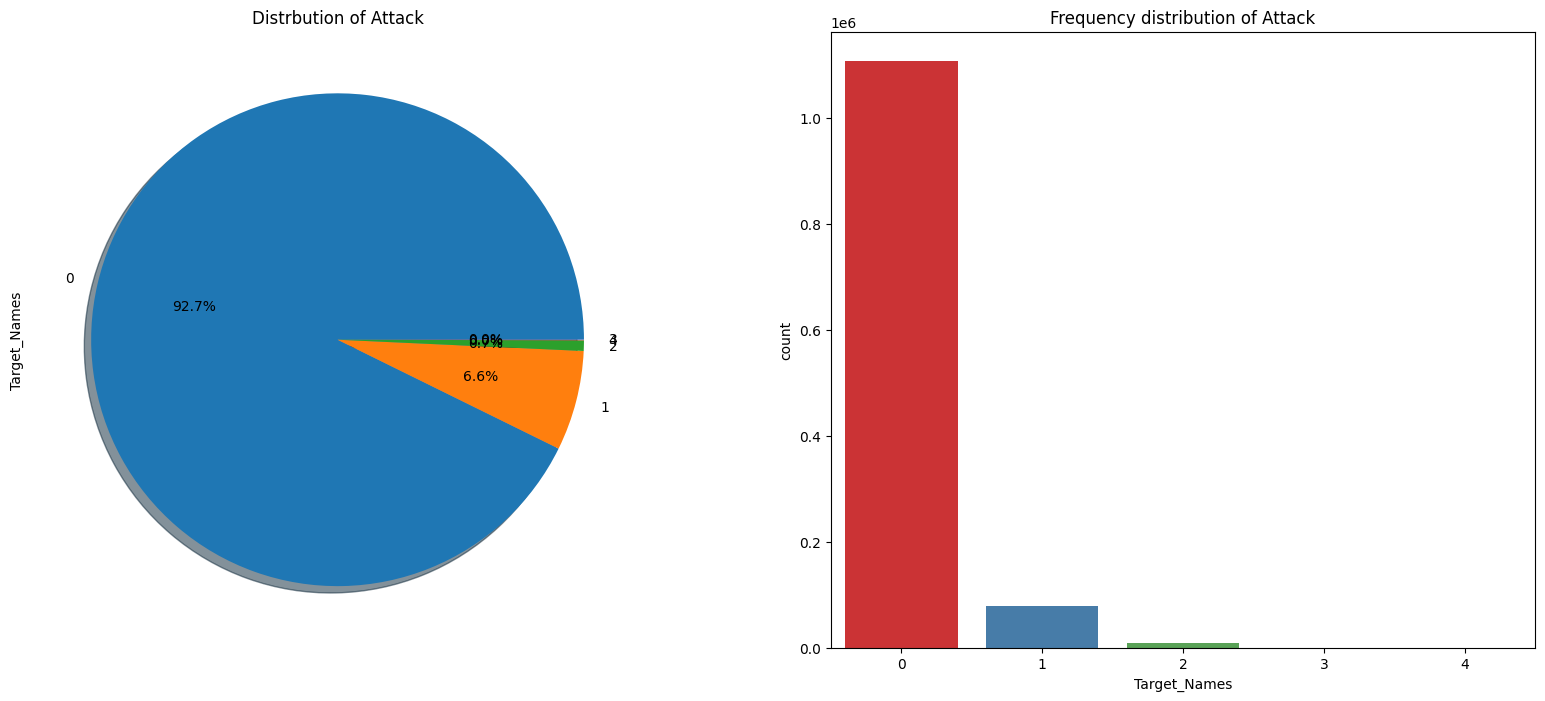

In [ ]:
#plotting our data for visualization
f,ax=plt.subplots(1,2,figsize=(20,8))
ax[0] = df['Target_Names'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distrbution of Attack')
ax[1] = sns.countplot(x="Target_Names", data=df, palette="Set1",linewidth=1.0)
ax[1].set_title("Frequency distribution of Attack")
plt.show()

We can clearly observe that it is an imbalanced data for our attacks so we will be using SMOTE to balance it.

##Data Preprocessing

In [ ]:
#importing necessary libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
#creating two datasets set_A contains all the infected targets while set_B contains all normal targets(for balancing data)
set_A = df[df['Target_Names'].isin([1, 2,3,4])]
set_B = df[df['Target_Names'] == 0]

In [ ]:
#printing set_A
set_A

,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,DstBytes,SrcBytes,TotBytes,SrcLoad,...,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Traffic,Target,Target_Names
3,0,61771,80,4,0,4,0,248,248,1.672747e+03,...,0,0,0.0,0.889555,0,419.338813,0.0,DoS,1,1
5,0,20559,80,2,0,2,0,124,124,0.000000e+00,...,0,0,0.0,0.000000,0,0.000000,0.0,DoS,1,1
7,0,42211,80,2,0,2,0,124,124,2.480000e+08,...,0,0,0.0,0.000002,0,0.000000,0.0,DoS,1,1
13,4,17810,502,76,0,76,0,5776,5776,9.312485e+03,...,0,2432,0.0,4.896652,0,138.621609,0.0,DoS,1,1
25,2,31188,502,45,0,45,0,3394,3394,9.156427e+03,...,0,1440,0.0,2.899821,0,91.813289,0.0,DoS,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194406,3,19642,80,4,0,4,0,248,248,4.102488e+02,...,0,0,0.0,3.627067,0,1813.532500,0.0,DoS,1,1
1194424,0,64170,80,2,0,2,0,124,124,4.960000e+08,...,0,0,0.0,0.000001,0,0.000000,0.0,DoS,1,1
1194441,1,31001,80,4,0,4,0,248,248,7.659112e+02,...,0,0,0.0,1.942784,0,915.828688,0.0,DoS,1,1
1194444,0,13049,80,2,0,2,0,124,124,4.960000e+08,...,0,0,0.0,0.000001,0,0.000000,0.0,DoS,1,1


In [ ]:
#dropping Traffic and Target Columns
set_A=set_A.drop(columns=['Traffic','Target'],axis=1)
set_A

,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,DstBytes,SrcBytes,TotBytes,SrcLoad,...,dTtl,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Target_Names
3,0,61771,80,4,0,4,0,248,248,1.672747e+03,...,0,0,0,0,0.0,0.889555,0,419.338813,0.0,1
5,0,20559,80,2,0,2,0,124,124,0.000000e+00,...,0,0,0,0,0.0,0.000000,0,0.000000,0.0,1
7,0,42211,80,2,0,2,0,124,124,2.480000e+08,...,0,0,0,0,0.0,0.000002,0,0.000000,0.0,1
13,4,17810,502,76,0,76,0,5776,5776,9.312485e+03,...,0,2432,0,2432,0.0,4.896652,0,138.621609,0.0,1
25,2,31188,502,45,0,45,0,3394,3394,9.156427e+03,...,0,1440,0,1440,0.0,2.899821,0,91.813289,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194406,3,19642,80,4,0,4,0,248,248,4.102488e+02,...,0,0,0,0,0.0,3.627067,0,1813.532500,0.0,1
1194424,0,64170,80,2,0,2,0,124,124,4.960000e+08,...,0,0,0,0,0.0,0.000001,0,0.000000,0.0,1
1194441,1,31001,80,4,0,4,0,248,248,7.659112e+02,...,0,0,0,0,0.0,1.942784,0,915.828688,0.0,1
1194444,0,13049,80,2,0,2,0,124,124,4.960000e+08,...,0,0,0,0,0.0,0.000001,0,0.000000,0.0,1


In [ ]:
#printing set_B
set_B

,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,DstBytes,SrcBytes,TotBytes,SrcLoad,...,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Traffic,Target,Target_Names
0,0,59034,502,10,8,18,508,644,1152,87486.093750,...,20,44,0.001176,0.053037,0,0.000000,0.0,normal,0,0
1,0,55841,502,10,8,18,508,644,1152,88077.296875,...,20,44,0.001308,0.052681,0,0.000000,0.0,normal,0,0
2,0,63774,502,10,8,18,508,644,1152,89587.390625,...,20,44,0.000690,0.051793,0,0.000000,0.0,normal,0,0
4,3,0,0,14,0,14,0,868,868,1842.256714,...,0,476,0.000000,3.500055,0,525.146562,0.0,normal,0,0
6,0,61906,502,6,6,12,384,396,780,88727.570312,...,20,44,0.000659,0.029754,0,0.000000,0.0,normal,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194459,0,57730,502,10,8,18,508,644,1152,85970.507812,...,20,44,0.001238,0.053972,0,0.000000,0.0,normal,0,0
1194460,0,59930,502,6,6,12,386,396,782,80946.835938,...,22,46,0.000646,0.032614,0,0.000000,0.0,normal,0,0
1194461,0,64384,502,10,8,18,508,644,1152,87953.750000,...,20,44,0.000668,0.052755,0,0.000000,0.0,normal,0,0
1194462,0,53833,502,10,8,18,508,644,1152,89604.695312,...,20,44,0.000676,0.051783,0,0.000000,0.0,normal,0,0


In [ ]:
#dropping Traffic and Target Columns
set_B=set_B.drop(columns=['Traffic','Target'],axis=1)
set_B

,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,DstBytes,SrcBytes,TotBytes,SrcLoad,...,dTtl,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Target_Names
0,0,59034,502,10,8,18,508,644,1152,87486.093750,...,64,24,20,44,0.001176,0.053037,0,0.000000,0.0,0
1,0,55841,502,10,8,18,508,644,1152,88077.296875,...,64,24,20,44,0.001308,0.052681,0,0.000000,0.0,0
2,0,63774,502,10,8,18,508,644,1152,89587.390625,...,64,24,20,44,0.000690,0.051793,0,0.000000,0.0,0
4,3,0,0,14,0,14,0,868,868,1842.256714,...,0,476,0,476,0.000000,3.500055,0,525.146562,0.0,0
6,0,61906,502,6,6,12,384,396,780,88727.570312,...,64,24,20,44,0.000659,0.029754,0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194459,0,57730,502,10,8,18,508,644,1152,85970.507812,...,64,24,20,44,0.001238,0.053972,0,0.000000,0.0,0
1194460,0,59930,502,6,6,12,386,396,782,80946.835938,...,64,24,22,46,0.000646,0.032614,0,0.000000,0.0,0
1194461,0,64384,502,10,8,18,508,644,1152,87953.750000,...,64,24,20,44,0.000668,0.052755,0,0.000000,0.0,0
1194462,0,53833,502,10,8,18,508,644,1152,89604.695312,...,64,24,20,44,0.000676,0.051783,0,0.000000,0.0,0


In [ ]:
#Resampling data using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(set_A.drop('Target_Names', axis=1), set_A['Target_Names'])

In [ ]:
#Combining datas again to form new datasets
X_combined = pd.concat([X_resampled, set_B.drop('Target_Names', axis=1)])
y_combined = pd.concat([y_resampled, set_B['Target_Names']])

In [ ]:
#Splitting data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

In [ ]:
#printing X_train
X_train

,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,DstBytes,SrcBytes,TotBytes,SrcLoad,...,sTtl,dTtl,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct
485617,0,54628,502,10,8,18,508,644,1152,8.929430e+04,...,128,64,24,20,44,0.000719,0.051963,0,0.0000,0.0
755294,0,62270,502,10,8,18,508,644,1152,9.079879e+04,...,128,64,24,20,44,0.000632,0.051102,0,0.0000,0.0
62439,0,58362,80,2,0,2,0,124,124,4.960000e+08,...,246,0,0,0,0,0.000000,0.000001,0,3240.7815,0.0
94947,0,49415,502,10,8,18,508,644,1152,8.946476e+04,...,128,64,24,20,44,0.000629,0.051864,0,0.0000,0.0
542801,0,62821,502,10,8,18,508,644,1152,8.462520e+04,...,128,64,24,20,44,0.000697,0.054830,0,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,5,39567,502,4182,4182,8365,280254,284437,564691,4.470700e+05,...,64,64,50194,46011,96206,0.000664,5.088586,0,0.0000,0.0
1187708,0,58392,502,10,8,18,508,644,1152,8.135070e+04,...,128,64,24,20,44,0.001445,0.057037,0,0.0000,0.0
131932,0,39052,34672,2,0,2,0,124,124,4.960000e+08,...,49,0,0,0,0,0.000000,0.000001,0,0.0000,0.0
386048,0,64178,502,10,8,18,508,644,1152,8.660918e+04,...,128,64,24,20,44,0.001242,0.053574,0,0.0000,0.0


In [ ]:
#printing X_test
X_test

,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,DstBytes,SrcBytes,TotBytes,SrcLoad,...,sTtl,dTtl,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct
808580,0,65110,502,10,8,18,508,644,1152,89217.046875,...,128,64,24,20,44,0.000733,0.052008,0,0.0,0.0
297874,0,61940,502,10,8,18,508,644,1152,89582.203125,...,128,64,24,20,44,0.000697,0.051796,0,0.0,0.0
370458,0,60986,502,10,8,18,508,644,1152,83270.523438,...,128,64,24,20,44,0.001243,0.055722,0,0.0,0.0
720038,0,53558,502,10,8,18,508,644,1152,86800.359375,...,128,64,24,20,44,0.000750,0.053456,0,0.0,0.0
96493,0,47894,21701,2,2,4,124,124,248,68623.259930,...,46,64,0,0,0,0.000000,0.007228,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104417,0,62528,502,6,6,12,384,396,780,92372.289062,...,128,64,24,20,44,0.000700,0.028580,0,0.0,0.0
349088,0,54855,502,10,8,18,508,644,1152,83430.726562,...,128,64,24,20,44,0.001082,0.055615,0,0.0,0.0
638073,0,57608,502,10,8,18,508,644,1152,85107.945312,...,128,64,24,20,44,0.001240,0.054519,0,0.0,0.0
991386,0,56413,502,10,8,18,508,644,1152,89578.750000,...,128,64,24,20,44,0.000651,0.051798,0,0.0,0.0


In [ ]:
#printing y_train
y_train

485617     0
755294     0
62439      1
94947      0
542801     0
          ..
259178     4
1187708    0
131932     2
386048     0
121958     2
Name: Target_Names, Length: 1136534, dtype: int64

In [ ]:
#printing y_test
y_test

808580    0
297874    0
370458    0
720038    0
96493     2
         ..
104417    0
349088    0
638073    0
991386    0
544381    0
Name: Target_Names, Length: 284134, dtype: int64

In [ ]:
#checking counts in data after processing
from collections import Counter
print('After SMOTE(y_train): ',Counter(y_train))
print('After SMOTE(y_test): ',Counter(y_test))

After SMOTE(y_train):  Counter({0: 885374, 1: 62976, 4: 62838, 2: 62697, 3: 62649})
After SMOTE(y_test):  Counter({0: 222074, 3: 15656, 2: 15608, 4: 15467, 1: 15329})


In [ ]:
#in combined datset
from collections import Counter
print('After SMOTE: ',Counter(y_combined))

After SMOTE:  Counter({0: 1107448, 1: 78305, 2: 78305, 3: 78305, 4: 78305})


##Visual Description

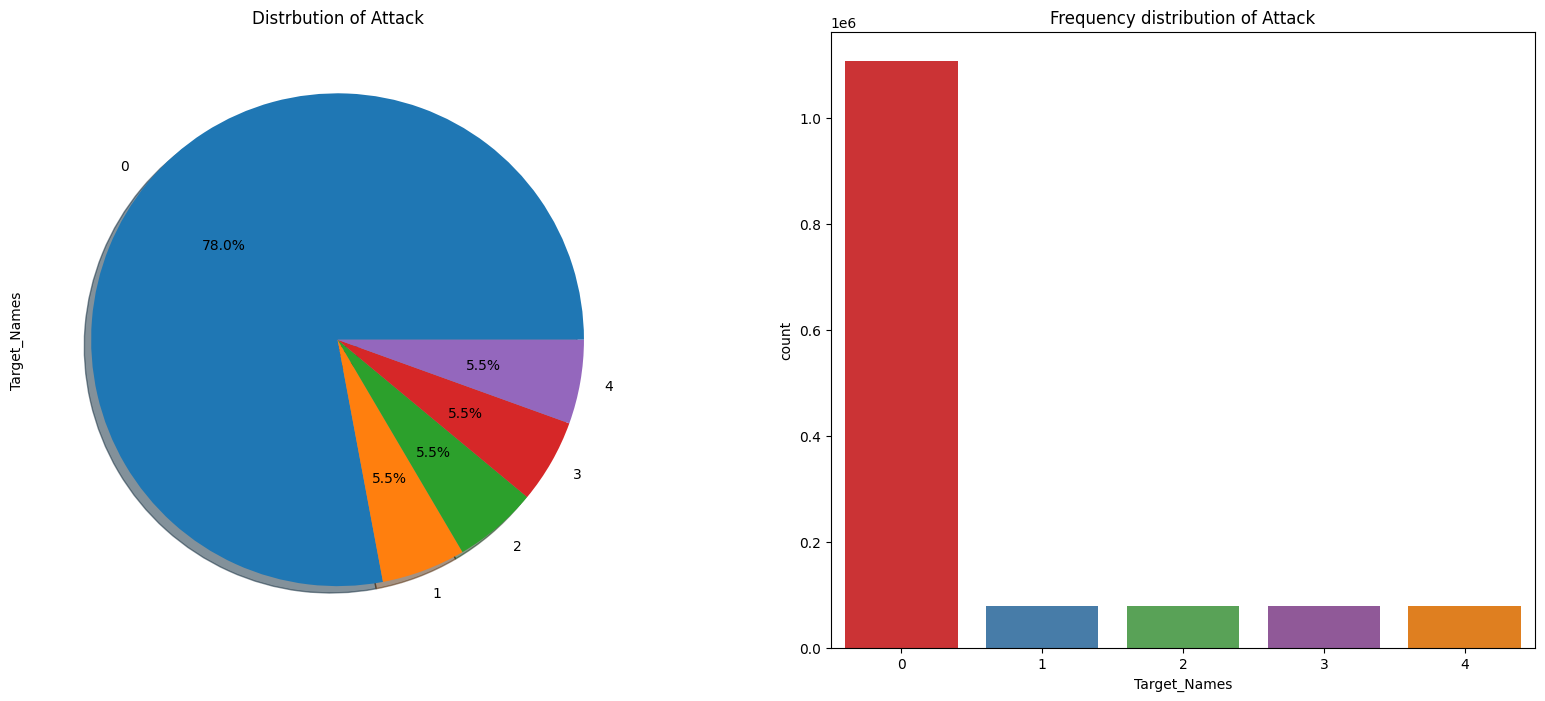

In [ ]:
#Visualizing data formed after balancing
f,ax=plt.subplots(1,2,figsize=(20,8))
ax[0] = y_combined.value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distrbution of Attack')
ax[1] = sns.countplot(x=y_combined, data=df, palette="Set1",linewidth=1.0)
ax[1].set_title("Frequency distribution of Attack")
plt.show()

##Naive Bayes

In [ ]:
#Using Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
model4=GaussianNB()
nb_model = MultinomialNB()

In [ ]:
#fitting in NaiveBayes Model
nb_model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
#Predicting value from X_test
y_pred=nb_model.predict(X_test)

In [ ]:
#Checking Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8314844404400741

In [ ]:
#Printing confusion matrix but by using crosstab
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4
Target_Names,,,,,
0,219849,515,964,188,558
1,8243,118,6049,0,919
2,6630,1773,6592,0,613
3,5148,0,0,8279,2229
4,13530,0,0,522,1415


##Random Forest

In [ ]:
#Importing Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Fitting it in model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Predicting usin X_test
y_pred = rf_classifier.predict(X_test)

In [ ]:
#Predicting Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.999971844270661

In [ ]:
#Printing confusion matrix but by using crosstab
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4
Target_Names,,,,,
0,222067,0,1,6,0
1,0,15329,0,0,0
2,0,0,15608,0,0
3,0,0,0,15656,0
4,1,0,0,0,15466


In [ ]:
#Finding Feature Importance
rf_classifier.feature_importances_

array([0.0007883 , 0.033624  , 0.04021338, 0.0120171 , 0.02072805,
       0.01095904, 0.02460715, 0.02030865, 0.01111267, 0.03052669,
       0.02505491, 0.02518886, 0.02741552, 0.01030686, 0.04021099,
       0.02136969, 0.00763221, 0.0091757 , 0.02182191, 0.00702913,
       0.09627666, 0.00644536, 0.08032869, 0.00327804, 0.00406773,
       0.0725346 , 0.06752023, 0.0052683 , 0.00740424, 0.00384831,
       0.00058782, 0.11087373, 0.01138444, 0.01798358, 0.02592149,
       0.02279119, 0.05528641, 0.0038106 , 0.00066304, 0.00306061,
       0.00057413])

In [ ]:
feature_scores = pd.Series(rf_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

sTtl          0.110874
DstJitter     0.096277
DIntPkt       0.080329
TcpRtt        0.072535
IdleTime      0.067520
SynAck        0.055286
Dport         0.040213
Rate          0.040211
Sport         0.033624
SrcLoad       0.030527
SrcRate       0.027416
DAppBytes     0.025921
Load          0.025189
DstLoad       0.025055
DstBytes      0.024607
TotAppByte    0.022791
pLoss         0.021822
SrcLoss       0.021370
DstPkts       0.020728
SrcBytes      0.020309
SAppBytes     0.017984
SrcPkts       0.012017
dTtl          0.011384
TotBytes      0.011113
TotPkts       0.010959
DstRate       0.010307
Loss          0.009176
DstLoss       0.007632
Min           0.007404
SrcJitter     0.007029
SIntPkt       0.006445
Sum           0.005268
Dur           0.004068
Max           0.003848
RunTime       0.003811
Proto         0.003278
SrcJitAct     0.003061
Mean          0.000788
sTos          0.000663
sDSb          0.000588
DstJitAct     0.000574
dtype: float64

Graphical Representation of Feature Importance

Text(0, 0.5, 'FEATURE NAMES')

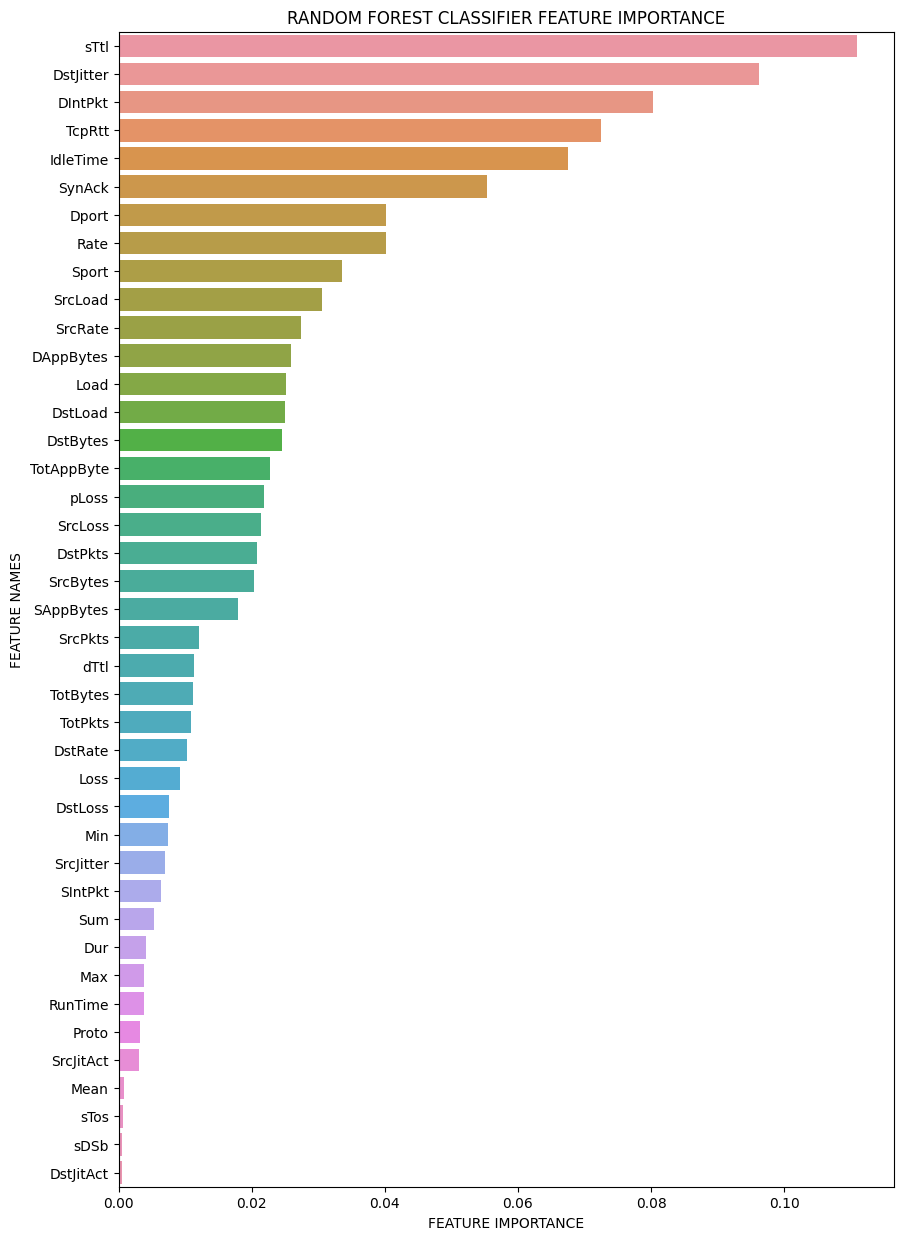

In [ ]:
data={'feature_names':feature_scores.index,'feature_importance':feature_scores}
feature_importance = pd.DataFrame(data)
#Sort the DataFrame in order decreasing feature importance
feature_importance.sort_values(by=['feature_importance'], ascending=False,inplace=True)
#Define size of bar plot
plt.figure(figsize=(10,15))
#Plot Searborn bar chart
sns.barplot(x=feature_importance['feature_importance'], y=feature_importance['feature_names'])
#Add chart labels
plt.title('RANDOM FOREST CLASSIFIER FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

##Accuracy Prediction using Top Selected Features of RandomForestClassifier

Selecting important features(Having features Score greater than 0.03)

In [ ]:
features = feature_scores[feature_scores >= 0.03].index

In [ ]:
df_filtered = X_combined[features]

In [ ]:
df_filtered.shape

(1420668, 10)

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df_filtered, y_combined, test_size = 0.25, random_state = 0)

Fitting splitted data into RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X1_train, y1_train)
y1_pred = clf.predict(X1_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_test,y1_pred)

0.9999718442310237

In [ ]:
pd.crosstab(y1_test,y1_pred)

col_0,0,1,2,3,4
Target_Names,,,,,
0,277295,0,1,8,1
1,0,19446,0,0,0
2,0,0,19321,0,0
3,0,0,0,19457,0
4,0,0,0,0,19638


##Logistic Regression

Using Logistic Regression to check Accuracy.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
logistic_reg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=100, random_state=42)
logistic_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', random_state=42, solver='saga')

In [ ]:
y2_pred = logistic_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y2_pred)

0.8352925028331702

In [ ]:
pd.crosstab(y_test,y2_pred)

col_0,0,2,3,4
Target_Names,,,,
0,221007,936,102,29
1,9280,6049,0,0
2,9016,6592,0,0
3,6386,0,7984,1286
4,13580,0,135,1752


##XGBoost

Using XGBoost to check Accuracy which indeed proved to be the best model for attack detection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined , y_combined, test_size=0.2, random_state=42)

In [ ]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_combined)))
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=5,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9999894416014978


Selecting most important features and plotting graph for the same

In [ ]:
feature_scores = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

dTtl          0.689230
SrcLoss       0.074939
sDSb          0.054758
Dport         0.041772
DIntPkt       0.037755
sTtl          0.026821
DstRate       0.011904
SAppBytes     0.010760
TcpRtt        0.009286
Sport         0.008733
SrcJitAct     0.006653
DstLoad       0.005976
Load          0.004967
Proto         0.003851
TotBytes      0.003075
IdleTime      0.002819
SrcBytes      0.002763
Loss          0.001453
pLoss         0.000611
DAppBytes     0.000430
TotPkts       0.000411
SrcRate       0.000353
SrcLoad       0.000320
Dur           0.000124
DstPkts       0.000108
SrcPkts       0.000078
TotAppByte    0.000016
SIntPkt       0.000014
Sum           0.000006
Rate          0.000004
DstJitter     0.000004
SynAck        0.000003
SrcJitter     0.000003
sTos          0.000000
RunTime       0.000000
Mean          0.000000
Max           0.000000
Min           0.000000
DstLoss       0.000000
DstBytes      0.000000
DstJitAct     0.000000
dtype: float32

Text(0, 0.5, 'FEATURE NAMES')

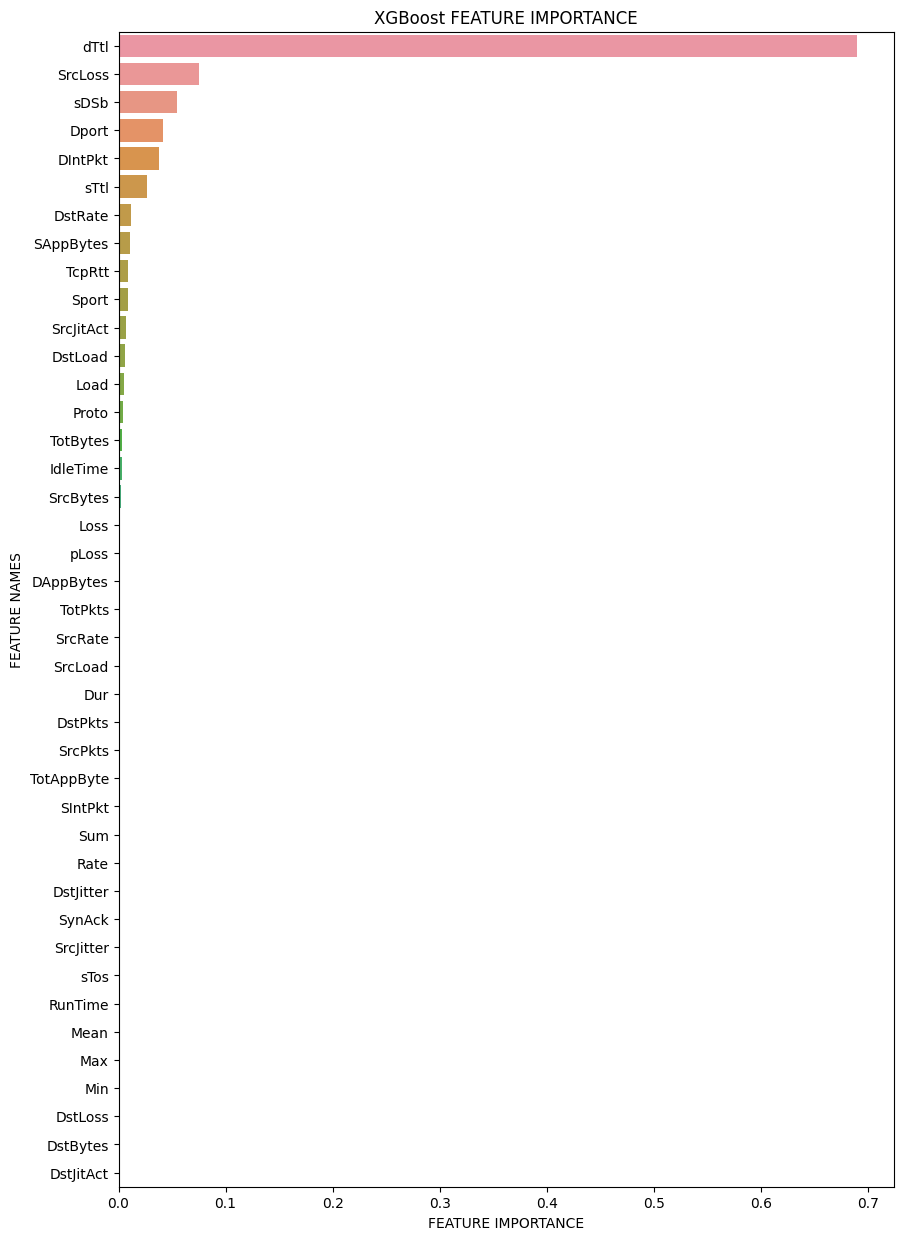

In [ ]:
data={'feature_names':feature_scores.index,'feature_importance':feature_scores}
feature_importance = pd.DataFrame(data)
#Sort the DataFrame in order decreasing feature importance
feature_importance.sort_values(by=['feature_importance'], ascending=False,inplace=True)
#Define size of bar plot
plt.figure(figsize=(10,15))
#Plot Searborn bar chart
sns.barplot(x=feature_importance['feature_importance'], y=feature_importance['feature_names'])
#Add chart labels
plt.title('XGBoost FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

In [ ]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4
Target_Names,,,,,
0,222071,0,1,2,0
1,0,15329,0,0,0
2,0,0,15608,0,0
3,0,0,0,15656,0
4,0,0,0,0,15467


##Naive Bayes

Finding Accuracy by Naive Bayes

In [ ]:
#Importing Naive Bayes
from sklearn.naive_bayes import GaussianNB
model4=GaussianNB()

In [ ]:
model4.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=model4.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.29510371866795243

Accuracy of Naive Bayes was extremely less but in such scenerios we can always use a Hybrid Model that indeed can help us in improving Accuracy. Like here we are going to use Logistic Regression along with Naive Bayes to improve accuracy.

##Improving Accuracy Using Hybrid Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
logistic_reg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=150, random_state=42)
logistic_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=150, multi_class='multinomial', random_state=42,
                   solver='saga')

In [ ]:
naive_bayes_predictions = naive_bayes_model.predict(X_test)
logistic_predictions = logistic_reg.predict(X_test)

In [ ]:
hybrid_features = np.column_stack((naive_bayes_predictions, logistic_predictions))

In [ ]:
hybrid_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=150, random_state=42)
hybrid_model.fit(hybrid_features, y_test)

LogisticRegression(max_iter=150, multi_class='multinomial', random_state=42,
                   solver='saga')

In [ ]:
final_hybrid_predictions = hybrid_model.predict(hybrid_features)

In [ ]:
accuracy = accuracy_score(y_test, final_hybrid_predictions)
print("Hybrid Model Accuracy:", accuracy)

Hybrid Model Accuracy: 0.8524604587976096


In [ ]:
pd.crosstab(y_test,final_hybrid_predictions)

col_0,0,1,2,3,4
Target_Names,,,,,
0,221007,914,21,56,76
1,9280,6049,0,0,0
2,9016,1226,5366,0,0
3,6386,0,0,7904,1366
4,13580,0,0,0,1887
